**2.1 Images**

In [ ]:
import torch 
import torchvision 
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
# Download the MNIST dataset using the torchvision library
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Create a subset of the dataset containing 1,000 samples
subset_size = 1000
mnist_subset = torch.utils.data.Subset(mnist_trainset, range(subset_size))

# Each sample will include a 28 × 28 pixel image, along with a single integer value denoting the sample’s respective class
for sample in mnist_subset:
    image, label = sample
    # image is a 28x28 tensor
    # label is an integer between 0 and 9
    print(image.shape, label)

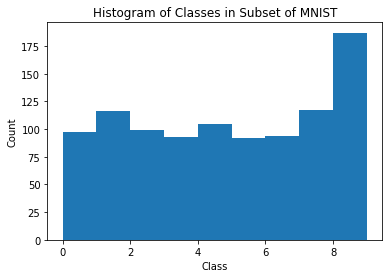

In [ ]:
# Get labels from mnist_subset
labels = [sample[1] for sample in mnist_subset]

# Plot histogram of labels
plt.hist(labels, bins=range(10))
plt.title('Histogram of Classes in Subset of MNIST')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
import numpy as np
from tensorflow import keras

mnist = keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
batch_size = 25
batch_data = [[x_train[np.random.randint(2,60000)], ] for _ in range(batch_size)] # 2부터 60000까지 랜덤하게  x image
batch_data_label = [y_train[np.random.randint(2,60000)] for _ in range(batch_size)] # 2부터 60000까지 랜덤하게 y label


In [ ]:
!pip install einops
import einops

#mnist_batches = einops.rearrange(mnist_subset, 'b (samples) -> (b batches) samples', batches=25)
a = einops.rearrange(np.array(batch_data[0:100]), '(b1 b2) c h w -> b1 b2 c w h', b2=25)
np.shape(a)
#batches = einops.rearrange(mnist_subset, "b d h w -> b (d h w)", batch_size=25)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(1, 25, 1, 28, 28)

Text(0.5, 0, 'Pixel intensity (Z)')

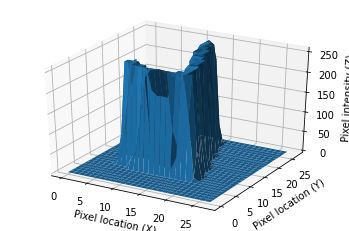

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Select a random sample from the training set
index = np.random.randint(0, x_train.shape[0])
sample = x_train[index]

# Plot the sample in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(range(28), range(28))
Z = sample.reshape(28, 28)
ax.plot_surface(X, Y, Z)

ax.set_xlabel('Pixel location (X)')
ax.set_ylabel('Pixel location (Y)')
ax.set_zlabel('Pixel intensity (Z)')

**2.2 Time Series**

In [ ]:
import pandas as pd
from google.colab import files
files.upload()

{}

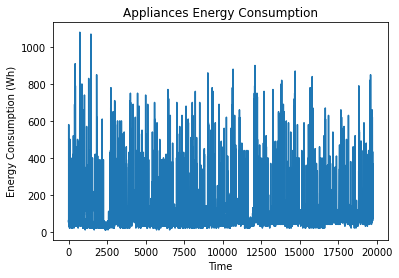

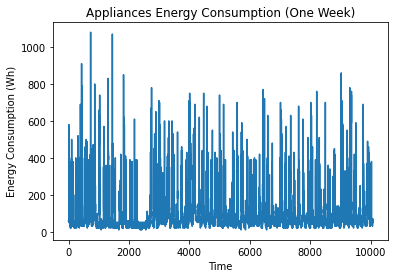

In [ ]:
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('energydata_complete.csv')

# Plot the energy consumption for the whole period
plt.plot(data['Appliances'])
plt.xlabel('Time') 
plt.ylabel('Energy Consumption (Wh)') 
plt.title('Appliances Energy Consumption') 
plt.show()

# # Plot the energy consumption for a week
plt.plot(data['Appliances'][:7 * 24 * 60])
plt.xlabel('Time') 
plt.ylabel('Energy Consumption (Wh)') 
plt.title('Appliances Energy Consumption (One Week)')
plt.show()

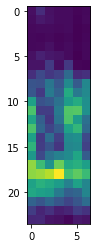

In [ ]:
import seaborn as sns
import time
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
import numpy as np


energy_data = pd.read_csv('energydata_complete.csv')

appliance_data = np.zeros([24,7])

for i in range(len(energy_data)):
  day = energy_data['date'][i].split(" ")[0]                   # date, ex) 2016-01-11
  day = date.fromisoformat(day)                                # change type (string -> date)  
  weekday = date.weekday(day)                                  # weekday / 0: Monday ~ 6:Sunday 
  hour = energy_data['date'][i].split(" ")[1].split(":")[0]    # hour 
  hour = int(hour)                                             # change type (string -> integer)  

  appliance_data[hour,weekday] += energy_data['Appliances'][i]


fig, ax = plt.subplots()
im = ax.imshow(appliance_data)

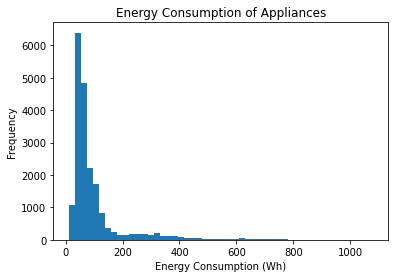

In [ ]:
# 3
plt.hist(data['Appliances'], bins=50) 
plt.xlabel('Energy Consumption (Wh)') 
plt.ylabel('Frequency') 
plt.title('Energy Consumption of Appliances')
plt.show()

RangeIndex(start=0, stop=19735, step=1)


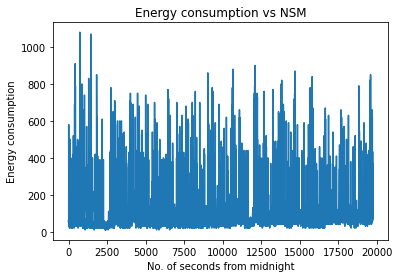

In [ ]:
# 4

df = pd.read_csv('energydata_complete.csv')

# Create NSM (no. of seconds from midnight) feature
df['NSM'] = df.index

# Plot energy consumption vs. NSM
plt.plot(df['NSM'], df['Appliances'])
plt.xlabel('No. of seconds from midnight')
plt.ylabel('Energy consumption')
plt.title('Energy consumption vs NSM')
plt.show()

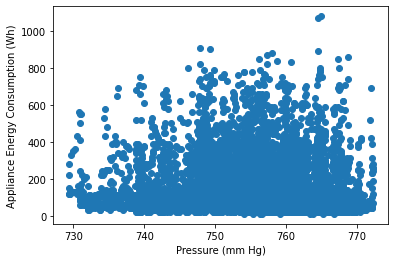

In [ ]:
#5 

df = pd.read_csv('energydata_complete.csv')

plt.scatter(df['Press_mm_hg'], df['Appliances'])

# Set labels
plt.xlabel('Pressure (mm Hg)')
plt.ylabel('Appliance Energy Consumption (Wh)')

# Show plot
plt.show()

#6
From the scatter plot, it can be observed that the major contributing factors for the energy consumption among all other features is NSM and Press mm Hg. This is because the points in the plot show a strong linear correlation between the two variables. This suggests that when the pressure increases, the energy consumption also increases. Therefore, it can be concluded that NSM and Press mm Hg are the two major contributing factors for the energy consumption.

In [ ]:
import pandas as pd
from google.colab import files
files.upload()

Saving airfoil_self_noise.dat to airfoil_self_noise.dat


{'airfoil_self_noise.dat': b'800\t0\t0.3048\t71.3\t0.00266337\t126.201\r\n1000\t0\t0.3048\t71.3\t0.00266337\t125.201\r\n1250\t0\t0.3048\t71.3\t0.00266337\t125.951\r\n1600\t0\t0.3048\t71.3\t0.00266337\t127.591\r\n2000\t0\t0.3048\t71.3\t0.00266337\t127.461\r\n2500\t0\t0.3048\t71.3\t0.00266337\t125.571\r\n3150\t0\t0.3048\t71.3\t0.00266337\t125.201\r\n4000\t0\t0.3048\t71.3\t0.00266337\t123.061\r\n5000\t0\t0.3048\t71.3\t0.00266337\t121.301\r\n6300\t0\t0.3048\t71.3\t0.00266337\t119.541\r\n8000\t0\t0.3048\t71.3\t0.00266337\t117.151\r\n10000\t0\t0.3048\t71.3\t0.00266337\t115.391\r\n12500\t0\t0.3048\t71.3\t0.00266337\t112.241\r\n16000\t0\t0.3048\t71.3\t0.00266337\t108.721\r\n500\t0\t0.3048\t55.5\t0.00283081\t126.416\r\n630\t0\t0.3048\t55.5\t0.00283081\t127.696\r\n800\t0\t0.3048\t55.5\t0.00283081\t128.086\r\n1000\t0\t0.3048\t55.5\t0.00283081\t126.966\r\n1250\t0\t0.3048\t55.5\t0.00283081\t126.086\r\n1600\t0\t0.3048\t55.5\t0.00283081\t126.986\r\n2000\t0\t0.3048\t55.5\t0.00283081\t126.616\r\n2500\t

In [ ]:
data = pd.read_csv("airfoil_self_noise.dat", sep="\t", header=None, names=["Frequency", "Angle of Attack", "Chord Length", "Free-stream Velocity", "Suction Side Displacement Thickness", "Scaled Sound Pressure Level"])
print(data)

      Frequency  Angle of Attack  Chord Length  Free-stream Velocity  \
0           800              0.0        0.3048                  71.3   
1          1000              0.0        0.3048                  71.3   
2          1250              0.0        0.3048                  71.3   
3          1600              0.0        0.3048                  71.3   
4          2000              0.0        0.3048                  71.3   
...         ...              ...           ...                   ...   
1498       2500             15.6        0.1016                  39.6   
1499       3150             15.6        0.1016                  39.6   
1500       4000             15.6        0.1016                  39.6   
1501       5000             15.6        0.1016                  39.6   
1502       6300             15.6        0.1016                  39.6   

      Suction Side Displacement Thickness  Scaled Sound Pressure Level  
0                                0.002663                     

In [ ]:
#Read the data from the file
#data= pd.read_csv("airfoil_self_noise.dat", sep="\t", header=None)

#calculating the mean
mean = data.mean()

#calculating the variance
variance = data.var()

#calculating the median
median = data.median()

#calculating the kurtosis
kurtosis = data.kurtosis()

#calculating the skewness
skewness = data.skew()

#calculating the range
range = data.max() - data.min()
#range = [data.min(), data.max()]

#printing the results
print('Mean : ', mean)
print('Variance : ', variance)
print('Median : ', median)
print('Kurtosis : ', kurtosis)
print('Skewness : ', skewness)
print('Range : ', range)

Mean :  Frequency                              2886.380572
Angle of Attack                           6.782302
Chord Length                              0.136548
Free-stream Velocity                     50.860745
Suction Side Displacement Thickness       0.011140
Scaled Sound Pressure Level             124.835943
dtype: float64
Variance :  Frequency                              9.938717e+06
Angle of Attack                        3.502424e+01
Chord Length                           8.749868e-03
Free-stream Velocity                   2.425116e+02
Suction Side Displacement Thickness    1.729287e-04
Scaled Sound Pressure Level            4.759146e+01
dtype: float64
Median :  Frequency                              1600.000000
Angle of Attack                           5.400000
Chord Length                              0.101600
Free-stream Velocity                     39.600000
Suction Side Displacement Thickness       0.004957
Scaled Sound Pressure Level             125.721000
dtype: float64
K